In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df = pd.read_csv('onlinefraud.csv', encoding = 'unicode_escape')

In [26]:
df.shape

(4166, 11)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4166 entries, 0 to 4165
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            4166 non-null   int64  
 1   type            4166 non-null   object 
 2   amount          4166 non-null   float64
 3   nameOrig        4166 non-null   object 
 4   oldbalanceOrg   4166 non-null   float64
 5   newbalanceOrig  4166 non-null   float64
 6   nameDest        4166 non-null   object 
 7   oldbalanceDest  4166 non-null   float64
 8   newbalanceDest  4166 non-null   float64
 9   isFraud         4166 non-null   int64  
 10  isFlaggedFraud  4166 non-null   int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 358.1+ KB


In [28]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,CASH_OUT,9864.23,C2142893855,0.00,0.00,C1254526270,15207.22,0.00,0,0
1,1,PAYMENT,7538.00,C359806817,249221.81,241683.81,M824900551,0.00,0.00,0,0
2,5,CASH_IN,24248.86,C1359212194,10300000.00,10400000.00,C2083562754,2748383.99,2808555.73,0,0
3,5,CASH_IN,146131.91,C216815884,4376628.71,4522760.62,C1234776885,1090357.03,944225.12,0,0
4,8,CASH_OUT,13179.56,C921640333,0.00,0.00,C1387567249,91559.81,154903.48,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4161,8,CASH_OUT,179499.25,C237368060,0.00,0.00,C1805445027,389524.82,0.00,0,0
4162,7,PAYMENT,3772.29,C1820969262,10245.35,6473.06,M1645253408,0.00,0.00,0,0
4163,8,CASH_IN,480444.71,C525371205,1703565.62,2184010.34,C1311325237,895724.80,5465400.62,0,0
4164,8,PAYMENT,15577.30,C1342407971,1545.00,0.00,M1329614931,0.00,0.00,0,0


In [29]:
# Exploring transaction type
type_counts = df.type.value_counts()

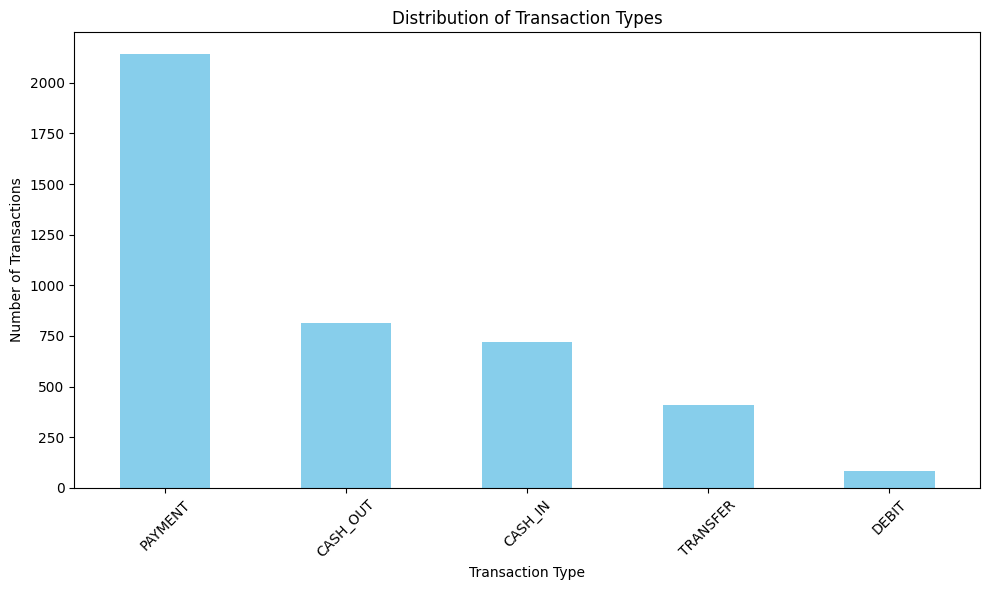

In [30]:
# Distribution of Transaction Type
plt.figure(figsize=(10, 6))
type_counts.plot(kind='bar', color='skyblue')

# Add labels and a title for clarity
plt.title('Distribution of Transaction Types')
plt.xlabel('Transaction Type')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.tight_layout()

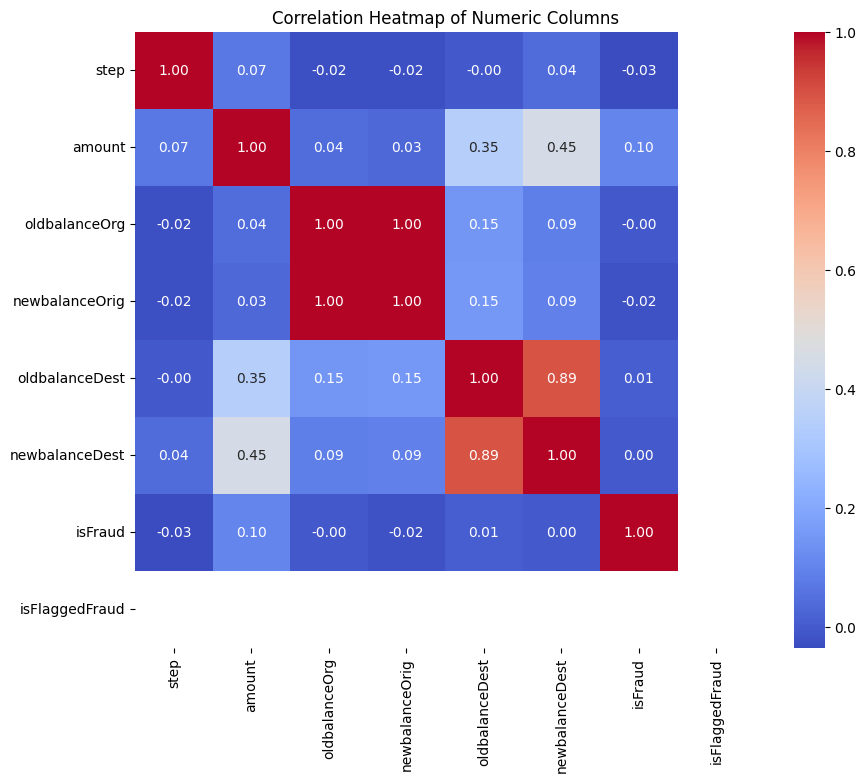

In [31]:
# Correlation heatmap on numeric columns
# Select only the numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Columns')
plt.show()

In [33]:
# Encode 'type' which is categorical into numerical value
df_encoded = pd.get_dummies(df, columns=['type'], drop_first=True)

In [36]:
# Splitting the data
from sklearn.model_selection import train_test_split
features = ['amount', 'oldbalanceOrg', 'newbalanceOrig'] + list(df_encoded.filter(like='type_'))
X = df_encoded[features]
y = df_encoded['isFraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [37]:
# Training a machine learning model
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [38]:
# Calculate and print the model's score
score = model.score(X_test, y_test)
print(f"Model Accuracy: {score:.4f}")

Model Accuracy: 0.9916


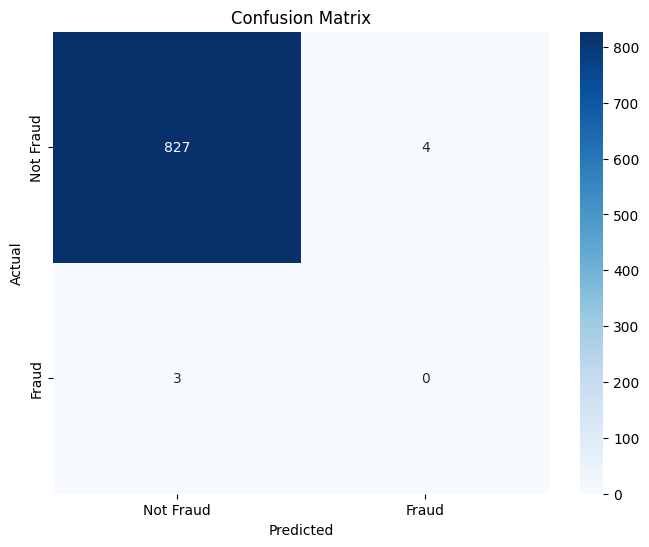

In [39]:
from sklearn.metrics import confusion_matrix

# Get the model's predictions on the test set
y_pred = model.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()